In [1]:
import emcee
import numpy as np
import matplotlib.pyplot as plt
from corner import corner

In [2]:
%matplotlib inline

### These are the functions to compute the model. Final model is mod4 and the four fitted parameters are rho0, rs, b, and c 

In [3]:
def beta(xaxis, rho0, rs, b):
    return rho0*((1+(xaxis/rs)**2)**(3*b/2))**(-1)

def mod4(xaxis, rho0, rs, b, c):
    return beta(xaxis, rho0, rs, b) + c

### This is the function to compute the likelihood, theta are the parameters (rho0, rs, b, c), xaxis, the data in x, profile the data in y, and std the errors                                             

In [4]:
def lnlike(theta, xaxis, profile, std):
    return -0.5*np.sum((mod4(xaxis, *theta)-profile)**2/std**2)

### Function to check priors                                                                                                                                                                                    

In [5]:
def lnprior(theta, priors):
    if (priors[0][0] < theta[0] < priors[0][1]) & (priors[1][0] < theta[1] < priors[1][1]) & (priors[2][0] < theta[2] < priors[2][1]) & (priors[3][0] < theta[3] < priors[3][1]):
        return 0.0
    else:
        return -np.inf

### Compute the likelihood in function of the priors

In [6]:
def lnprob(theta, priors, xaxis, profile, std):
    lp = lnprior(theta, priors)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, xaxis, profile, std)

### These are the data

In [7]:
r, rho, rho_err = np.load('data.npy')

### Plot the data

Text(0,0.5,'rho')

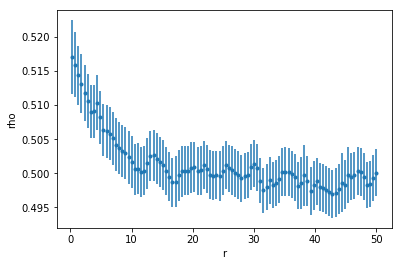

In [8]:
plt.errorbar(r, rho, rho_err, fmt='.')
plt.xlabel('r')
plt.ylabel('rho')

### Parametrisation of the MCMC

In [9]:
ndim = 4 #number of parameters to fit                                                                                                                                                                   
nwalkers = 2*ndim #numbers of chain in parallel                                                                                                                                                         
nsteps = 10000 #number of steps in each chain                                                                                                                                                          
ncut = int(0.1*nsteps) #percentage of elements to remove from the beginning of the chains (to ensure the convergence) 

### Priors 

In [10]:
priors = [[0.008, 0.04], [0.01, 10.], [0.1, 1.], [0.4965, 0.505]]

### Initial positions

In [11]:
pos0 = [0.01791221, 3.48155049, 0.4263093, 0.500]

### Initial positions for each chain (noise added for independency of the chains)

In [12]:
pos = [pos0 + np.random.randn(ndim)*0.005*pos0 for i in range(nwalkers)]

### Define MCMC object

In [13]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(priors, r, rho, rho_err))

### Run MCMC

In [14]:
sampler.run_mcmc(pos, nsteps)

(array([[0.01251897, 7.29839125, 0.97373435, 0.4993536 ],
        [0.01655933, 5.55000966, 0.72620807, 0.49921513],
        [0.0146798 , 5.74938219, 0.75380002, 0.49959047],
        [0.01589313, 3.60911109, 0.49824922, 0.49858691],
        [0.01421954, 7.57914526, 0.68119427, 0.49794716],
        [0.01969406, 2.35983663, 0.36656252, 0.49861105],
        [0.01757328, 3.47329623, 0.37431744, 0.49723321],
        [0.01576554, 7.51298791, 0.91420556, 0.49821903]]),
 array([-5.47318221, -4.12718129, -4.86748053, -4.72983796, -5.7232227 ,
        -4.39596862, -4.75083654, -5.70805656]),
 ('MT19937', array([2368559886, 2944686038, 3637115247,  274940916, 2068189097,
         3177052648, 1294252640, 2707349687, 1288442578, 2295989142,
         1922665781, 2929375623, 2568170783,  257349772, 2613139361,
         2556584076, 4042390126, 3106918754, 1916200504, 1195948555,
         2408341877, 2922683247,  724818407, 1364799211, 3840804008,
         1007686406, 3602060955, 3488381842, 3477086104,

### Restructure the chain of parameters  

In [15]:
samples = sampler.chain[:, ncut:, :].reshape((-1, ndim))

### Plot the fitted models and the distributions and the correlations of the parameters

Text(0,0.5,'rho')

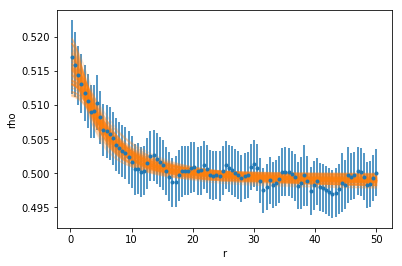

In [17]:
number_of_param = 100
param = samples[np.random.randint(len(samples), size=number_of_param)]
plt.errorbar(r, rho, rho_err, fmt='.')
for i in range(number_of_param):
    plt.plot(r, mod4(r, *param[i]), alpha=0.2, c='C1')
plt.xlabel('r')
plt.ylabel('rho')

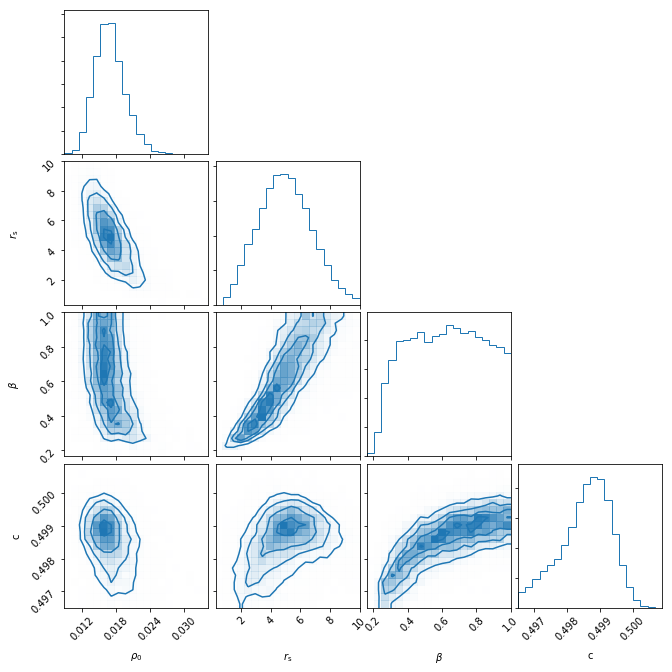

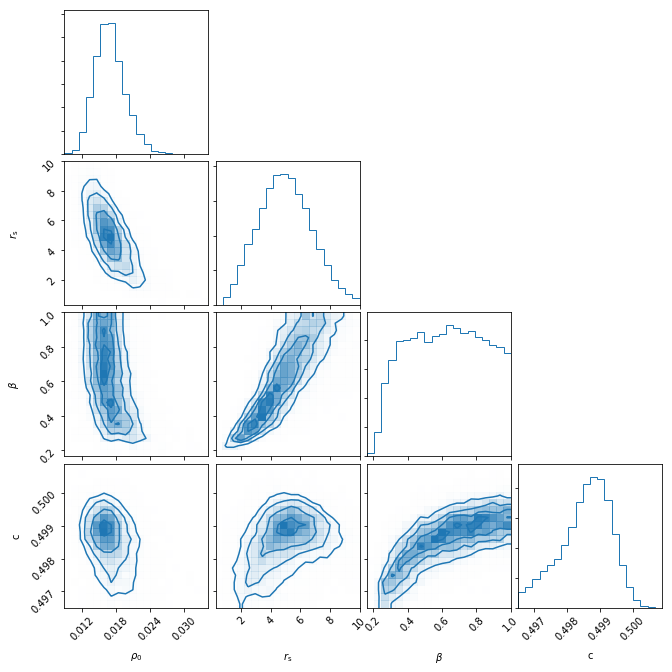

In [18]:
labels = [r'$\rho_0$', r'$r_\mathrm{s}$', r'$\beta$', r'c']
corner(samples, labels=labels, plot_datapoints=False, color='C0')